# **Телеграм бот "Поисковик Тиммейтов"**

## Проведем анализ сгенерированных данных и подведем итоги на их основе.



## **Для начала подключим необходимые библиотеки и прочитаем наши данные, а также выведем их на экран**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

with open("/content/data.json", 'r', encoding='utf-8') as f:
    current_problems_data = json.load(f)

df = pd.DataFrame(current_problems_data)
print("Данные о проблемах подбора тиммейтов:")
print(df)

Данные о проблемах подбора тиммейтов:
           game  goal_mismatch_rate  experience_gap_hours  toxicity_rate  \
0           CS2                  72                  1500             48   
1        Dota 2                  61                   600             42   
2           LoL                  55                   250             45   
3      Valorant                  45                   300             44   
4   Rainbow Six                  67                   550             43   
5  Apex Legends                  40                   420             20   
6          PUBG                  27                   240             15   
7         Other                  16                   100              7   

   quit_due_to_toxicity  rating_disparity_percent  
0                    15                        21  
1                    18                        17  
2                    20                        22  
3                    12                        16  
4                

## **Построим графики на основе данных и для каждого сделаем краткий вывод**

### **График №1. Токсичность**

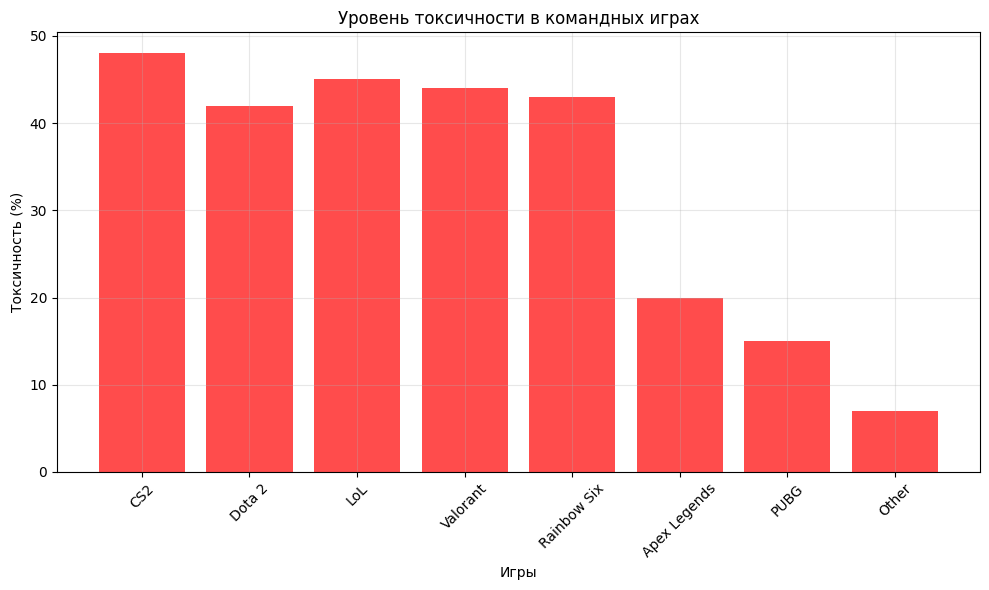

In [ ]:
plt.figure(figsize=(10, 6))
games = df['game']
toxicity = df['toxicity_rate']

plt.bar(games, toxicity, color='red', alpha=0.7)
plt.xlabel('Игры')
plt.ylabel('Токсичность (%)')
plt.title('Уровень токсичности в командных играх')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1. Самый высокий уровень токсичности среди приведенных сообществ наблюдается в игре Counter-Strike 2  ***≈ 47%***
2. Самый низкий уровень токсичности среди конкретных сообществ наблюдается в игре PUBG ***≈ 14%***
3. По данным графикам видно, что токсичное поведение присутствует во всех основных командных играх, выходя за рамки сугубо соревновательных жанров.

**Вывод:** Проблема токсичного поведения является универсальной не только для соревновательных игр, но и для других жанров, однако её масштабы кардинально различаются.


### **График №2. Несовпадение целей игроков.**

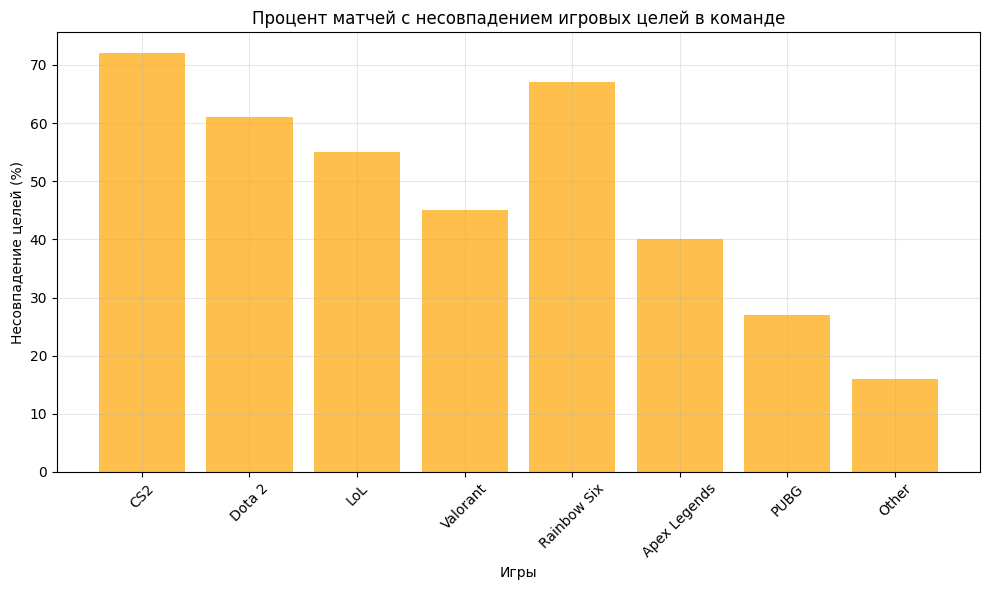

In [ ]:
plt.figure(figsize=(10, 6))
goal_mismatch = df['goal_mismatch_rate']

plt.bar(games, goal_mismatch, color='orange', alpha=0.7)
plt.xlabel('Игры')
plt.ylabel('Несовпадение целей (%)')
plt.title('Процент матчей с несовпадением игровых целей в команде')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1. В каждой игре присутствует различие в целях игроков.
2. Если рассматривать конкретные соревновательные игры, то Counter-Strike 2 имеет наибольший процент несовпадения целей игроков.
3. Различие целей присутсвует не только в соревновательных играх.

**Вывод:** Проведя причинно-следственную связь с данными о токсичности, становится очевидно, что расхождение в целях игроков служит мощным катализатором агрессии. Когда участники команды по-разному понимают задачи игры (один нацелен на результат, другой — на процесс), их взаимодействие превращается в поле для конфликта, что напрямую влияет на общую атмосферу в сообществе.

### **График №3. Разница в опыте.**

/tmp/ipython-input-57594096.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(games, rotation=45)
/tmp/ipython-input-57594096.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(games, rotation=45)


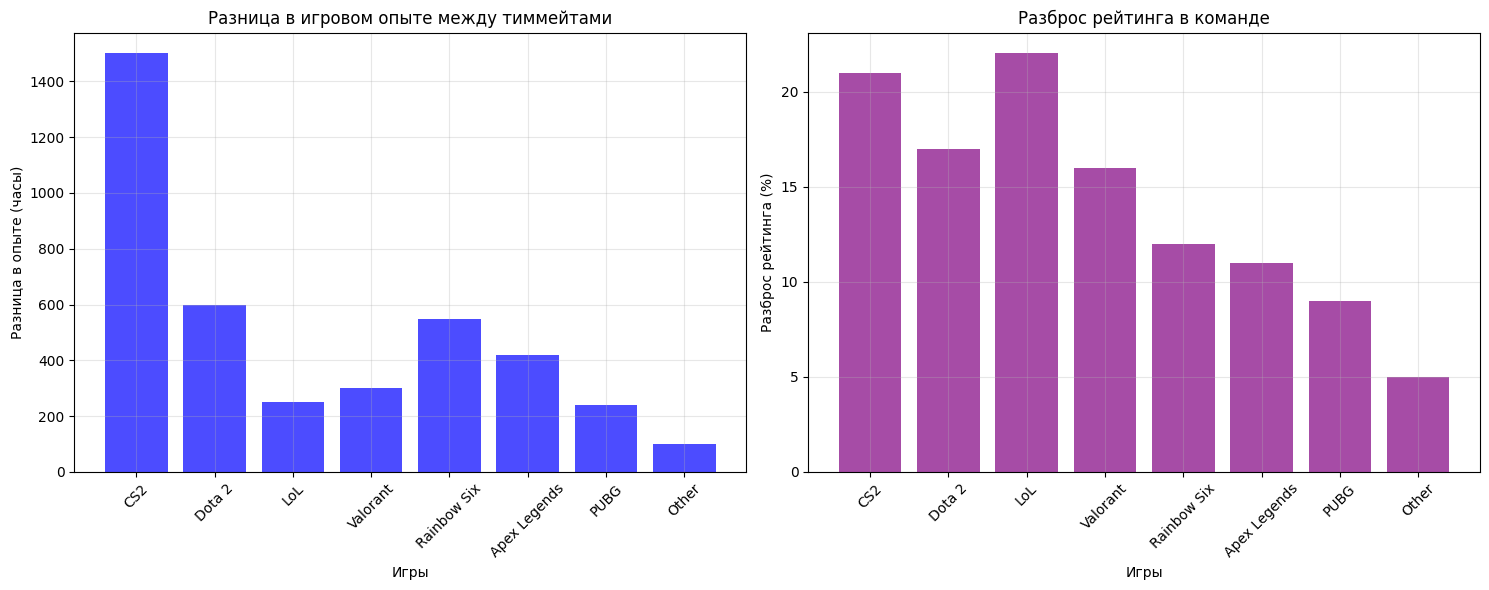

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(games, df['experience_gap_hours'], alpha=0.7, color='blue')
ax1.set_xlabel('Игры')
ax1.set_ylabel('Разница в опыте (часы)')
ax1.set_title('Разница в игровом опыте между тиммейтами')
ax1.set_xticklabels(games, rotation=45)
ax1.grid(True, alpha=0.3)


ax2.bar(games, df['rating_disparity_percent'], alpha=0.7, color='purple')
ax2.set_xlabel('Игры')
ax2.set_ylabel('Разброс рейтинга (%)')
ax2.set_title('Разброс рейтинга в команде')
ax2.set_xticklabels(games, rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

1. Разница в игровом опыте — Алгоритмы подбора команд (матчмейкинг) в большинстве игр, включая Counter-Strike 2, не учитывают общее количество часов, проведённых в игре. Это приводит к ситуациям, когда новички и ветераны оказываются в одной команде, что создаёт почву для непонимания.
2. Разница в рейтинге — Системы матчмейкинга часто жертвуют однородностью команд по уровню навыков (рейтингу) ради скорости поиска матча. В результате в одной команде могут оказаться игроки с кардинально разным пониманием игры.
3. Проводя связь с токсичностью игроков, разница в опыте также является ключевым фактором разногласий в команде.

**Вывод:** Проблема токсичности во многом коренится в компромиссах матчмейкинга. Жертвуя сбалансированностью команд ради скорости поиска, системы подбора сами создают среду для конфликтов, объединяя игроков с неравным рейтингом и разным пониманием игры.

### **График №4. Покидание матча.**

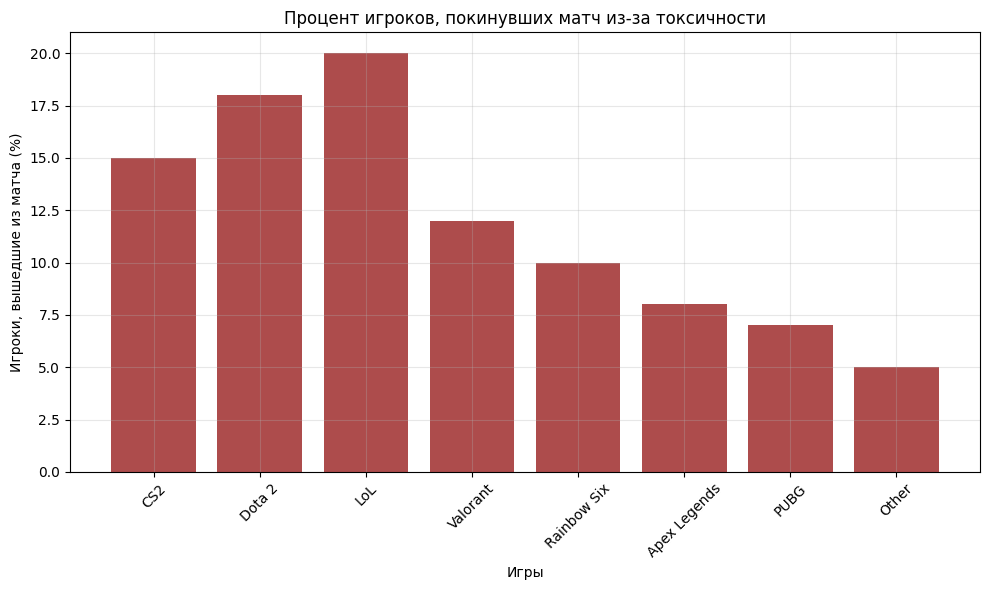

In [ ]:
plt.figure(figsize=(10, 6))
quit_toxicity = df['quit_due_to_toxicity']

plt.bar(games, quit_toxicity, color='darkred', alpha=0.7)
plt.xlabel('Игры')
plt.ylabel('Игроки, вышедшие из матча (%)')
plt.title('Процент игроков, покинувших матч из-за токсичности')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1. Напряженная обстановка в команде может влиять на преждевременный выход из игры.
2. Наибольший процент досрочного завершения матчей наблюдается в Dota 2 и League of Legends — играх с максимальной продолжительностью партий (до 90 минут). Это объясняется тем, что в условиях сложившейся токсичной обстановки игрок проводит рациональную оценку: затраты времени и нервов на завершение заведомо проигранного или психологически невыносимого матча превышают возможное наказание за его покидание.

**Вывод**: Негативная обстановка в команде влияет на сам результат игры, не каждый человек готов доигрывать игру в такой ситуации, иногда "легче" выйти из матча.

### **График №5. Итог.**

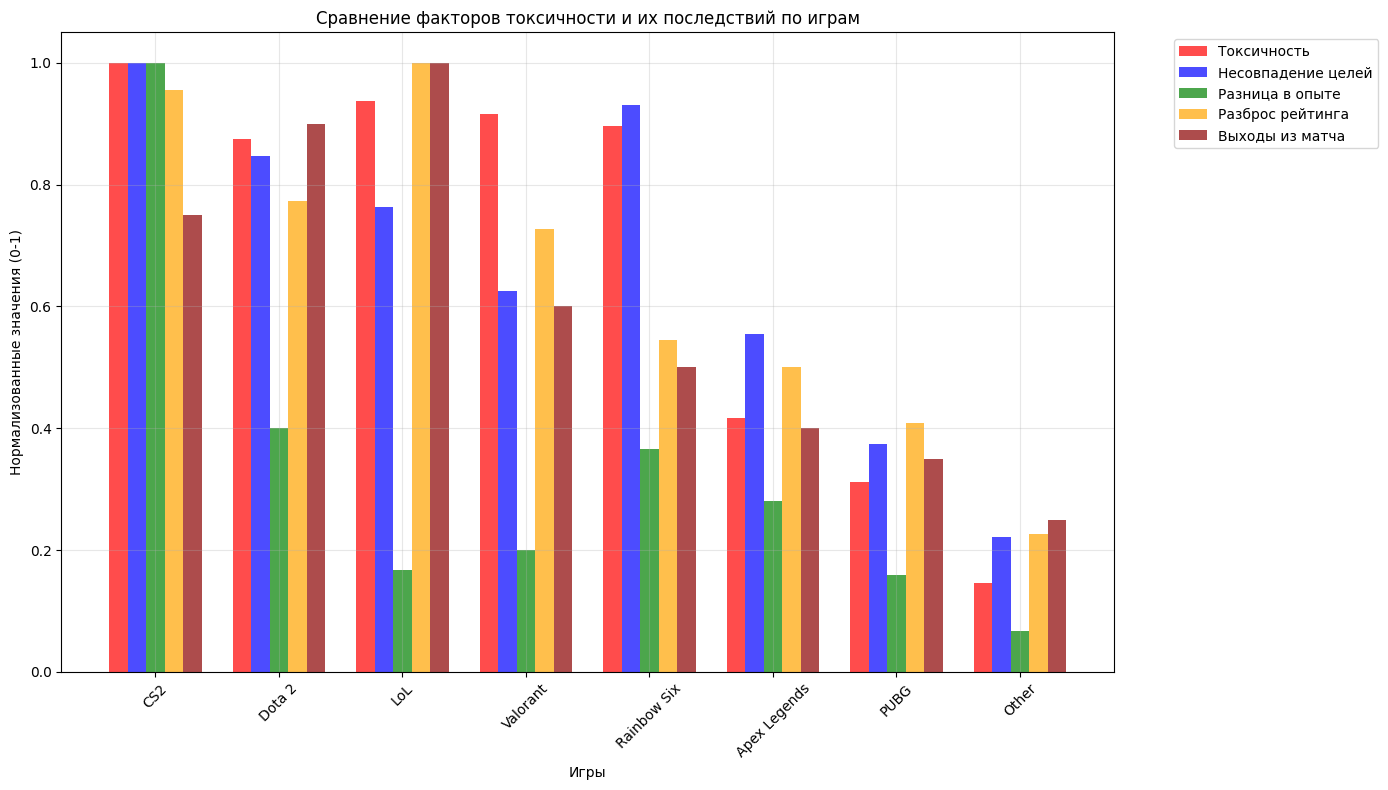

In [ ]:
plt.figure(figsize=(14, 8))

normalized_toxicity = df['toxicity_rate'] / df['toxicity_rate'].max()
normalized_mismatch = df['goal_mismatch_rate'] / df['goal_mismatch_rate'].max()
normalized_experience = df['experience_gap_hours'] / df['experience_gap_hours'].max()
normalized_rating = df['rating_disparity_percent'] / df['rating_disparity_percent'].max()
normalized_quit = df['quit_due_to_toxicity'] / df['quit_due_to_toxicity'].max()

x = np.arange(len(games))
width = 0.15

plt.bar(x - width*2, normalized_toxicity, width, label='Токсичность', alpha=0.7, color='red')
plt.bar(x - width*1, normalized_mismatch, width, label='Несовпадение целей', alpha=0.7, color='blue')
plt.bar(x, normalized_experience, width, label='Разница в опыте', alpha=0.7, color='green')
plt.bar(x + width*1, normalized_rating, width, label='Разброс рейтинга', alpha=0.7, color='orange')
plt.bar(x + width*2, normalized_quit, width, label='Выходы из матча', alpha=0.7, color='darkred')

plt.xlabel('Игры')
plt.ylabel('Нормализованные значения (0-1)')
plt.title('Сравнение факторов токсичности и их последствий по играм')
plt.xticks(x, games, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **Подведем итоги.**

### **Выявленные проблемы:**

1. Универсальность токсичности - токсичность присутствует в каждой игре.
2. Конфликт мотиваций игроков - различие в целях создает фундамент для конфликтов.
3. Системные недостатки матчмейкинга - не учитывание разницы в игровом опыте, жертвование сбалансированностью команд ради скорости поиска.
4. Психологическая нагрузка и досрочные выходы - игроки проводят оценку: "Стоит ли игра этого?", токсичная атмосфера делает продолжение игры психологически невыносимым.

### **Полезность бота:**

1. Матчмейкинг с учетом дополнительной информации о игроках.
2. Поиск постоянной команды, в частности друзей.
3. Получение нового опыта для игроков.
4. Поможет построить дружную и эффективную команду.



## **Вывод:**
Проект не просто подбирает сокомандников, а создает условия для формирования здоровых игровых команд, основанных на общих целях и взаимном уважении. Бот рассчитан на широкую аудиторию - от новичков, до опытных игроков. Таким образом,проект будет не только улучшать качество отдельно взятой сессии, но и способствовать созданию более позитивной и устойчивой команды.